In [80]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [56]:
import pandas as pd
import io


In [57]:
import numpy as np
import matplotlib.pyplot as plt



In [81]:
df = pd.read_csv(io.BytesIO(uploaded['Salary_Data.csv']))
print(df)

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872


In [82]:
df=df.rename(columns={'YearsExperience': "YE", 'Salary' : "S"})
df

,YE,S
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <a list of 10 Patch objects>)

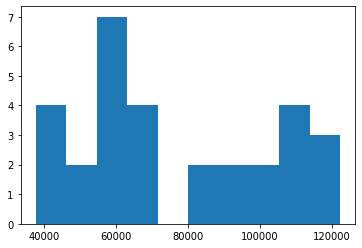

In [84]:
plt.hist(df.S)

{'boxes': [<matplotlib.lines.Line2D at 0x7f41774c9b10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f41774ceb90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f41774d5bd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f41774d5690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f41774ce110>,
  <matplotlib.lines.Line2D at 0x7f41774ce650>]}

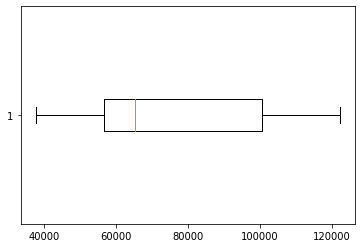

In [85]:
plt.boxplot(df.S,0,"rs",0)

Text(0, 0.5, 'YE')

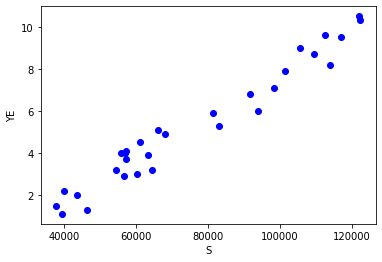

In [86]:
plt.plot(df.S,df.YE,"bo");plt.xlabel("S");plt.ylabel("YE")

In [87]:
#to find correlation
df.S.corr(df.YE)

0.9782416184887598

In [89]:
np.corrcoef(df.S,df.YE)

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [90]:
import statsmodels.formula.api as smf
model=smf.ols("S~YE",data=df).fit()
model.params

Intercept    25792.200199
YE            9449.962321
dtype: float64

In [91]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           1.14e-20
Time:                        04:29:11   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YE          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
pred=model.predict(df)
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

Text(0, 0.5, 'S')

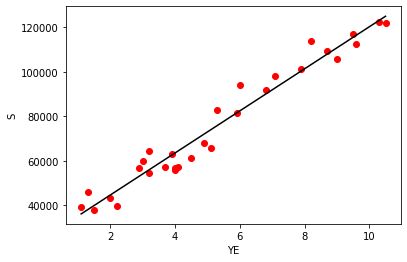

In [93]:
import matplotlib.pyplot as plt
plt.scatter(x=df['YE'],y=df['S'],color='red');plt.plot(df['YE'],pred,color='black');plt.xlabel("YE");plt.ylabel("S")

In [94]:
pred.corr(df.S)


0.9782416184887601

In [95]:
#Transforming variables for accuracy
model1=smf.ols("S~np.log(YE)", data=df).fit()
model1
model.params
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           3.25e-13
Time:                        04:30:34   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YE)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
pred1=model1.predict(df)
pred1

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [97]:
pred1.corr(df.S)

0.924061081788264

Text(0, 0.5, 'S')

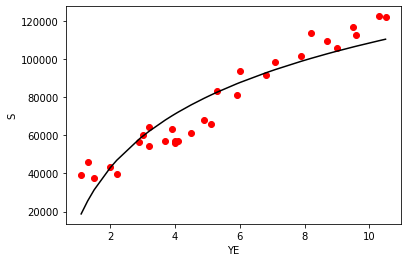

In [98]:
#Data Vizualization
import matplotlib.pyplot as plt
plt.scatter(x=df['YE'],y=df['S'],color='red');plt.plot(df['YE'],pred1,color='black');plt.xlabel("YE");plt.ylabel("S")

In [99]:
#Exponential Transformation
model2=smf.ols("np.log(S)~YE",data=df).fit()
model2.summary()
pred2=model2.predict(df)
pred2

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [100]:
pred2.corr(df.S)

0.9782416184887603

Text(0, 0.5, 'S')

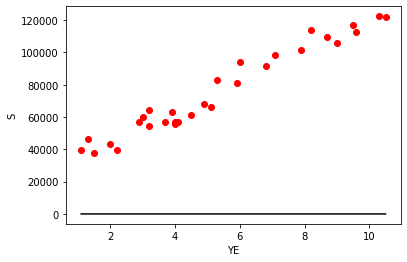

In [101]:
#Data Vizualization
import matplotlib.pyplot as plt
plt.scatter(x=df.YE,y=df.S,color='red');plt.plot(df.YE,pred2,color='black');plt.xlabel("YE");plt.ylabel("S")

In [102]:
#Quadratic Transformation
df["YE_Sq"]=df.YE*df.YE
model3=smf.ols('S~YE_Sq',data=df).fit()
model3.summary()
pred3=model3.predict(df)
pred3

0      48981.931230
1      49354.564241
2      49789.302755
3      51147.860608
4      51799.968377
5      54571.426398
6      55029.454474
7      55992.089753
8      55992.089753
9      58670.389521
10     59850.394057
11     60463.685888
12     60463.685888
13     61092.504094
14     63763.040674
15     66681.999262
16     68234.636808
17     69849.379857
18     75066.242014
19     75990.061354
20     83939.565592
21     87176.814877
22     96492.640157
23    100242.259832
24    106802.153466
25    110924.406153
26    118105.354806
27    119588.123663
28    130402.244175
29    133631.730272
dtype: float64

In [104]:
pred3.corr(df.S)

0.9567235158525461

Text(0, 0.5, 'S')

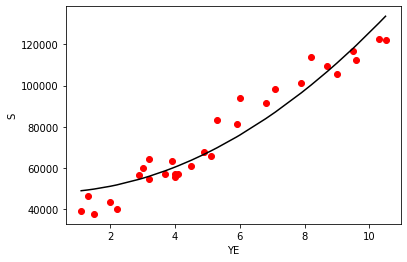

In [103]:
#Data Vizualization
import matplotlib.pyplot as plt
plt.scatter(x=df["YE"],y=df["S"],color='red');plt.plot(df["YE"],pred3,color='black');plt.xlabel("YE");plt.ylabel("S")